In [477]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np



In [478]:
df = pd.read_csv("data.csv")
df.head(2)

,STATION ID,STATION NAME,DATE,DAILY AVG TEMP (DEG F),DAILY MAX TEMP (DEG F),DAILY MIN TEMP (DEG F),DAILY PRECIPITATION TOTAL (INCHES)
0,USW00093821,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",1/1/48,44.5,62.0,27.0,1.28
1,USW00093821,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",1/2/48,30.5,35.0,26.0,0.00


In [479]:
df = df.drop(['STATION ID'], axis=1)
df = df.rename(columns = {"STATION NAME":'Station', 
                          'DATE': 'Date', 
                          "DAILY AVG TEMP (DEG F)" : "Average_Temp", 
                          "DAILY MAX TEMP (DEG F)" : "Max_Temp",	
                          "DAILY MIN TEMP (DEG F)" : "Min_Temp",	
                          "DAILY PRECIPITATION TOTAL (INCHES)" : "Rain_Fall"})
df.head(2)

,Station,Date,Average_Temp,Max_Temp,Min_Temp,Rain_Fall
0,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",1/1/48,44.5,62.0,27.0,1.28
1,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",1/2/48,30.5,35.0,26.0,0.00


In [480]:
# Split the 'Date' column into day, month, and year
df[['Month', 'Day', 'Year']] = df['Date'].str.split('/', expand=True)

df['Year'] = df['Year'].astype(int)

# Adjust the year based on the specified conditions
df['Year'] = df['Year'].apply(lambda x: x + 1900 
                              if 48 <= x <= 99 
                              else x + 2000 
                              if 0 <= x <= 23 
                              else x)

# Combine day, month, and corrected year into a new 'Date' column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], format='%Y-%m-%d', errors='coerce')

# Check the resulting 'Date' column
df['Date'].head(2)

0   1948-01-01
1   1948-01-02
Name: Date, dtype: datetime64[ns]

In [481]:

# Get decade from 'Date' and make new column 'Decade'
df['Decade'] = df['Date'].dt.year // 10 * 10

# Define how to aggregate
agg_functions = {
    'Date': 'first', 
    'Average_Temp': 'mean', 
    'Max_Temp': 'mean', 
    'Min_Temp': 'mean', 
    'Rain_Fall': 'mean'
}

# Group the data by 'Decade' and aggregate
df_decade = df.groupby(df['Decade']).agg(agg_functions)

# Reset the index to make 'Decade' a column
df_decade.reset_index(inplace=True)


# Round the columns to 2 decimal places
df_decade[['Average_Temp', 'Max_Temp', 'Min_Temp', 'Rain_Fall']] = df_decade[['Average_Temp', 'Max_Temp', 'Min_Temp', 'Rain_Fall']].round(2)

# remove 1940 and 2020 as they arent complete
df_decade = df_decade[(df_decade['Decade'] != 1940) & (df_decade['Decade'] != 2020)]

df_decade.head(20)


,Decade,Date,Average_Temp,Max_Temp,Min_Temp,Rain_Fall
1,1950,1950-01-01,57.07,67.52,46.63,0.12
2,1960,1960-01-01,55.34,65.54,45.14,0.11
3,1970,1970-01-01,56.33,65.85,46.81,0.13
4,1980,1980-01-01,56.67,66.44,46.90,0.11
5,1990,1990-01-01,57.90,67.43,48.53,0.12
6,2000,2000-01-01,58.32,67.50,49.14,0.13
7,2010,2010-01-01,59.42,68.79,50.06,0.14


In [482]:
# Get decade from 'Date' and make a new column 'Decade'
df['Decade'] = df['Date'].dt.year // 10 * 10

# Extract month from 'Date' and make a new column 'Month'
df['Month'] = df['Date'].dt.month

# Define how to aggregate
agg_functions = {
    'Date': 'first', 
    'Average_Temp': 'mean', 
    'Max_Temp': 'mean', 
    'Min_Temp': 'mean', 
    'Rain_Fall': 'mean'
}

# Group the data by 'Decade' and 'Month' and aggregate
df_monthly_decade = df.groupby(['Decade', 'Month']).agg(agg_functions)

# Reset the index to make 'Decade' and 'Month' columns
df_monthly_decade.reset_index(inplace=True)

# Round the columns to 2 decimal places
df_monthly_decade[['Average_Temp', 'Max_Temp', 'Min_Temp', 'Rain_Fall']] = df_monthly_decade[['Average_Temp', 'Max_Temp', 'Min_Temp', 'Rain_Fall']].round(2)

# Remove 1940 and 2020 as they are not complete
df_monthly_decade = df_monthly_decade[(df_monthly_decade['Decade'] != 1940) & (df_monthly_decade['Decade'] != 2020)]

# Display the resulting DataFrame
df_monthly_decade.head(3)


,Decade,Month,Date,Average_Temp,Max_Temp,Min_Temp,Rain_Fall
12,1950,1,1950-01-01,35.85,43.94,27.76,0.16
13,1950,2,1950-02-01,38.90,48.09,29.72,0.13
14,1950,3,1950-03-01,44.57,54.34,34.81,0.12


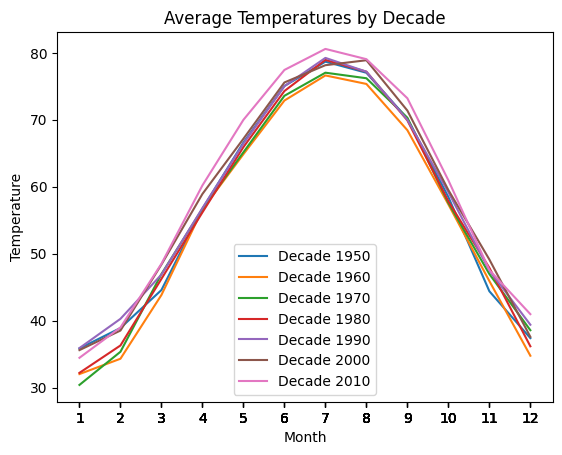

In [483]:
# Separate data by decades
decades = df_monthly_decade['Decade'].unique()

# Create a separate line for each decade
for decade in decades:
    subset = df_monthly_decade[df_monthly_decade['Decade'] == decade]
    plt.plot(subset['Month'], subset['Average_Temp'], label=f'Decade {decade}')

plt.legend()

# naming x axis
plt.xlabel('Month')

# naming y axis
plt.ylabel('Temperature')

# title to the graph
plt.title('Average Temperatures by Decade')

# x-axis labels 
plt.xticks(df_monthly_decade['Month'])

# Show the plot
plt.show()

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27184 entries, 0 to 27183
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Station       27184 non-null  object        
 1   Date          27184 non-null  datetime64[ns]
 2   Average_Temp  27184 non-null  float64       
 3   Max_Temp      27179 non-null  float64       
 4   Min_Temp      27179 non-null  float64       
 5   Rain_Fall     27175 non-null  float64       
 6   Month         27184 non-null  int64         
 7   Day           27184 non-null  object        
 8   Year          27184 non-null  int64         
 9   Decade        27184 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 2.1+ MB
